<a href="https://colab.research.google.com/github/gongx030/seatac_manuscript/blob/main/SeATAC_OSK_MEFs_D7_sf4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compare MACS2 and SeATAC for detecting differential V-plots of ATAC-seq data between MEFs and MEFs at day7 post OSK induction 

This task runs on SeATAC `v0.4.0`

In [1]:
start_time <- Sys.time()

### Install external packages

In [2]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [3]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

### Install R packages from CRAN

In [4]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
required_packages <- c(
  "GenomicAlignments",
  'BSgenome.Mmusculus.UCSC.mm10',
  'motifmatchr',
  'uwot',
  'igraph',
  'VennDiagram',
  'patchwork',
  'TxDb.Mmusculus.UCSC.mm10.knownGene',
  'org.Mm.eg.db',
  'clusterProfiler'
 )

In [6]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'BiocVersion', 'GenomicAlignments',
  'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'uwot', 'igraph',
  'VennDiagram', 'patchwork', 'TxDb.Mmusculus.UCSC.mm10.knownGene',
  'org.Mm.eg.db', 'clusterProfiler'

also installing the dependencies ‘rjson’, ‘pracma’, ‘xtable’, ‘R.oo’, ‘R.methodsS3’, ‘filelock’, ‘gridGraphics’, ‘tweenr’, ‘polyclip’, ‘lazyeval’, ‘restfulr’, ‘poweRlaw’, ‘annotate’, ‘R.utils’, ‘plogr’, ‘formatR’, ‘BiocFileCache’, ‘png’, ‘gridExtra’, ‘fastmatch’, ‘ggfun’, ‘ggplotify’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘ape’, ‘tidytree’, ‘treeio’, ‘RCurl’, ‘GenomeInfoDbData’, ‘XVector’, ‘MatrixGenerics’, ‘Biobase’, ‘DelayedArray’, ‘zlibbioc’, ‘bitops’, ‘Rhtslib’, ‘snow’, ‘BH’, ‘rtracklayer’, ‘matrixStats’

In [7]:
library(devtools)

Loading required package: usethis



### Install R packages from github

In [8]:
install_github("GreenleafLab/chromVARmotifs")

vctrs        (0.4.0 -> 0.4.1) [CRAN]
blob         (1.2.2 -> 1.2.3) [CRAN]
RColorBrewer (1.1-2 -> 1.1-3) [CRAN]
scales       (1.1.1 -> 1.2.0) [CRAN]


Installing 4 packages: vctrs, blob, RColorBrewer, scales

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpXAEaKd/remotes601ddf8f72/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’ ... OK
* preparing ‘chromVARmotifs’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘chromVARmotifs_0.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
devtools::install_github("GuangchuangYu/ChIPseeker")

enrichplot   (1.14.2 -> d11b60bb6...) [GitHub]
TxDb.Hsap... (NA     -> 3.2.2       ) [CRAN]
plotrix      (NA     -> 3.8-2       ) [CRAN]
gplots       (NA     -> 3.1.1       ) [CRAN]


Installing 3 packages: TxDb.Hsapiens.UCSC.hg19.knownGene, plotrix, gplots

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





* checking for file ‘/tmp/RtmpXAEaKd/remotes604c22d4/GuangchuangYu-enrichplot-d11b60b/DESCRIPTION’ ... OK
* preparing ‘enrichplot’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘enrichplot_1.13.1.992.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpXAEaKd/remotes603857d8a6/YuLab-SMU-ChIPseeker-5945269/DESCRIPTION’ ... OK
* preparing ‘ChIPseeker’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘ChIPseeker_1.31.4.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Install `seatac` from github

In [10]:
install_github('gongx030/seatac', quiet = FALSE, ref = 'v0.4.0') # install from the branch v0.4.0
devtools::reload(pkgload::inst("seatac"))
library(seatac)

tfautograph  (NA -> 0.3.2 ) [CRAN]
config       (NA -> 0.3.1 ) [CRAN]
here         (NA -> 1.0.1 ) [CRAN]
RcppTOML     (NA -> 0.1.7 ) [CRAN]
zeallot      (NA -> 0.1.0 ) [CRAN]
tfruns       (NA -> 1.5.0 ) [CRAN]
tensorflow   (NA -> 2.8.0 ) [CRAN]
reticulate   (NA -> 1.24  ) [CRAN]
keras        (NA -> 2.8.0 ) [CRAN]
abind        (NA -> 1.4-5 ) [CRAN]
tfdatasets   (NA -> 2.7.0 ) [CRAN]
tfprobabi... (NA -> 0.15.0) [CRAN]


Installing 12 packages: tfautograph, config, here, RcppTOML, zeallot, tfruns, tensorflow, reticulate, keras, abind, tfdatasets, tfprobability

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpXAEaKd/remotes604befa720/gongx030-seatac-55f9f36/DESCRIPTION’ ... OK
* preparing ‘seatac’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘seatac_0.4.0-010.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tensorflow

Loading required package: tfprobability

Loading required package: tfdatasets

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘pa

### Load R packages

In [11]:
library(BSgenome.Mmusculus.UCSC.mm10)
library(dplyr)
library(motifmatchr)
library(chromVARmotifs)
library(igraph)
library(VennDiagram)
library(ggplot2)
library(patchwork)
library(ChIPseeker)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(clusterProfiler)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: rtracklayer


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Biostrings’:

    collapse, intersect, setdiff, setequal, union


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, u

### TensorFlow setup

In [12]:
gpus <- tf$config$list_physical_devices('GPU')
for (gpu in gpus){
  tf$config$experimental$set_memory_growth(gpu, TRUE)
}
logical_gpus <- tf$config$experimental$list_logical_devices('GPU')
sprintf('Physical GPUs: %d', length(gpus)) %>% message()
sprintf('Logical GPUs: %d', length(logical_gpus)) %>% message()

Loaded Tensorflow version 2.8.0

Physical GPUs: 1

Logical GPUs: 1



In [13]:
Sys.time() - start_time

Time difference of 33.58581 mins

## Parameters

In [14]:
ARGS <- list(
  bin_size = 5L,
  fragment_size_range_max = 640L,
  fragment_size_interval = 20L,
  window_size = 1000L,
  block_size = 640L,
  sliding_step = 20L,
  min_reads = 10L,
  vae_num_peaks = 5000L,
  vae_latent = c(5L),
  vae_filters0 = c(128L),
  vae_filters = c(32L),
  vae_downsample_layers = 4L,
  vae_upsample_layers = 4L,
  vae_base_learning_rate = c(1e-2),
  vae_epochs = 200L,
  vae_beta_schedule_method = c('constant'),
  vae_beta0 = 1,
  vae_batch_size = c(128L),
  vae_warmup_ratio = 0.1,
  padjusted_cutoff = 0.05,
  log_ratio_cutoff = 0.1,
  step_size = 200L,
  upstream = -5000,
  downstream = 1000,
  pvalueCutoff = 1,
  qvalueCutoff = 1,
  nucleoatac_cutoff = 0.4,
  center_width = 100L # the center width
)

#MEF

## Putative OSK motif regions with differential vplots

In [15]:
tab <- read.table('https://s3.msi.umn.edu/gongx030/projects/seatac_project/config/seatac_OSKM/results.tsv', sep = '\t', header = TRUE)

In [16]:
res <- read.table(tab[tab$vae_latent == 5,]$remote_output_file, header = FALSE, sep = '\t')

In [17]:
colnames(res) <- c('seqnames','start','end','width','strand','pvalue_z','padj','nucleosome_treatment','nucleosome_control','log_ratio')

In [18]:
res <- GRanges(res)

In [19]:
sprintf('number of motif-centric regions: %s', length(res)) %>% message()

number of motif-centric regions: 282789



In [20]:
is_signif <- res$padj < 0.05
sprintf('# of significantly differential V-plots called by SeATAC: %d', sum(is_signif)) %>% message()

# of significantly differential V-plots called by SeATAC: 19603



# Read the summits called by MACS2 for OSK

In [21]:
remote_summit_files = c(
  MEF = 'https://s3.msi.umn.edu/dsouz072/projects/seatac_project/config/macs2_OSK_D7/1_summits.bed',
  MEF_OSK_D7 = 'https://s3.msi.umn.edu/dsouz072/projects/seatac_project/config/macs2_OSK_D7/2_summits.bed'
)
for (f in remote_summit_files){
  system(sprintf('wget -cx %s', f))
}
local_summit_files <- gsub('https://', './', remote_summit_files)

In [22]:
x1 <- read.table(local_summit_files[1], header = FALSE, sep = '\t')
x2 <- read.table(local_summit_files[2], header = FALSE, sep = '\t')
gr_macs <- list(x1, x2)
gr_mefs <- lapply(gr_macs, function(g){
  GRanges(seqnames = g[, 1], range = IRanges(start = g[, 2], end = g[, 3]), score = g[, 5])
}
)

In [23]:
sprintf('# of summits  called by MACS2 in undifferentiated MEFs: %d', length(gr_mefs[[1]])) %>% message()
sprintf('# of summits called by MACS2 in MEFs at D7 post OSK induction: %d', length(gr_mefs[[2]])) %>% message()

# of summits  called by MACS2 in undifferentiated MEFs: 83776

# of summits called by MACS2 in MEFs at D7 post OSK induction: 16379



In [24]:
names(gr_mefs) <- c('MEF','MEF_OSK_D7')

Instead of looking at the overlap between MACS2 summits with the entire 640 bp V-plot window, we only look at the center 100 bp region, which is consistent with the way that SeATAC calculate the central nucleosome values

In [25]:
mm <- lapply(gr_mefs, function(g){
  findOverlaps(g, resize(res, fix = 'center', width = ARGS[['center_width']])) %>% as.matrix()
}
)

In [26]:
mm <- lapply(names(mm), function(i){
  cbind(mm[[i]], score = gr_mefs[[i]][mm[[i]][, 'queryHits']]$score)
}
)
names(mm) <- c('MEF','MEF_OSK_D7')




In [27]:
sp <- lapply(mm, function(m){
  split(m[, 'score'], list(m[, 'subjectHits']))
}
)

In [28]:
score_mef <- sapply(sp$MEF, max)
score_osk <- sapply(sp$MEF_OSK_D7, max)

# Read nucleosomal signal obtained by NucleoATAC for OSK

In [29]:
s3_bw_files <- c(
  'MEF' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/MEF.dedup.nucleoatac_signal.smooth.bw',
  'MEF_OSK_D7' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/OSK_D7.dedup.nucleoatac_signal.smooth.bw'
)

In [30]:
for (i in 1:length(s3_bw_files)){
  sprintf('wget -x -c -nH %s', s3_bw_files[i]) %>% system()
}
s3_bw_files <- gsub('https://s3.msi.umn.edu/', './', s3_bw_files)
message(sprintf('all s3_bw_files exist: %s', all(file.exists(s3_bw_files))))

all s3_bw_files exist: TRUE



In [31]:
bw <- lapply(s3_bw_files, function(bw_file){
 rtracklayer::import.bw(
    bw_file, 
    which = trim(GenomicRanges::reduce(resize(res, fix = 'center', width = ARGS[['center_width']])))
  ) 
})

In [32]:
cvg_bd <- lapply(bw, function(x){coverage(x, weight = 'score')[resize(res, fix = 'center', width = ARGS[['center_width']])] %>% as.matrix()})

In [33]:
cvg <- data.frame(OSK = rowMeans(cvg_bd$MEF_OSK_D7), MEF = rowMeans(cvg_bd$MEF))

In [34]:
cvg$osk <- ifelse(cvg$OSK < cvg$MEF, 'TRUE','FALSE')

In [35]:
cvg$mef <- ifelse(cvg$OSK > cvg$MEF, 'TRUE','FALSE')

In [36]:
cvg$difference <- cvg$OSK - cvg$MEF

# Granges containing SeATAC, MACS2 and NucleoATAC data for region with increased nucleosome occupany in undifferentiated MEFs

In [37]:
down_mef <- res      #Down in undifferentiated MEFs
down_mef$macs2 <- 0
down_mef[as.numeric(names(score_osk))]$macs2 <- score_osk
down_mef$seatac <- -log10(down_mef$padj + 1e-100)
down_mef$difference <- cvg$difference
down_mef$osk <- cvg$osk

# Pathway analysis for NFR regions in D7 MEFs post OSK induction

In [38]:
up_osk <- list(seatac = down_mef[down_mef$log_ratio < -ARGS[['log_ratio_cutoff']] & down_mef$padj < ARGS[['padjusted_cutoff']]], 
  macs2 = down_mef[down_mef$macs2 > -log10(ARGS[['padjusted_cutoff']])],
  nucleoatac = down_mef[down_mef$difference < -0.4 & down_mef$osk == TRUE]
  )

In [39]:
sprintf('# of Vplots that have increased nuclsoeome occupancy at the center in MEFs at D7 post OSK induction with log ratio cutoff of 0.1 : %d', length(up_osk[[1]])) %>% message()
sprintf('# of summits called by MACS2 in MEFs at D7 post OSK induction : %d', length(up_osk[[2]])) %>% message()
sprintf('# of regions with increased nucleosome occupancy in undifferentiated MEFs : %d', length(up_osk[[3]])) %>% message()


# of Vplots that have increased nuclsoeome occupancy at the center in MEFs at D7 post OSK induction with log ratio cutoff of 0.1 : 7181

# of summits called by MACS2 in MEFs at D7 post OSK induction : 2841

# of regions with increased nucleosome occupancy in undifferentiated MEFs : 7918



###Annotate the peaks for OSK induction

In [40]:
anno_up_osk <- lapply(up_osk, function(s){annotatePeak(s, tssRegion = c(ARGS[['upstream']], ARGS[['downstream']]),TxDb = TxDb.Mmusculus.UCSC.mm10.knownGene,
        annoDb = 'org.Mm.eg.db')})

>> preparing features information...		 2022-04-15 08:55:17 PM 
>> identifying nearest features...		 2022-04-15 08:55:18 PM 
>> calculating distance from peak to TSS...	 2022-04-15 08:55:18 PM 
>> assigning genomic annotation...		 2022-04-15 08:55:18 PM 
>> adding gene annotation...			 2022-04-15 08:55:33 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-15 08:55:33 PM 
>> done...					 2022-04-15 08:55:33 PM 
>> preparing features information...		 2022-04-15 08:55:33 PM 
>> identifying nearest features...		 2022-04-15 08:55:33 PM 
>> calculating distance from peak to TSS...	 2022-04-15 08:55:33 PM 
>> assigning genomic annotation...		 2022-04-15 08:55:33 PM 
>> adding gene annotation...			 2022-04-15 08:55:36 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-15 08:55:36 PM 
>> done...					 2022-04-15 08:55:36 PM 
>> preparing features information...		 2022-04-15 08:55:36 PM 
>> identifying nearest features...		 2022-04-15 08:55:36 PM 
>> calculating distance from peak to TSS...	 2022-04-15 08:55:36 PM 
>> assigning genomic annotation...		 2022-04-15 08:55:36 PM 
>> adding gene annotation...			 2022-04-15 08:55:39 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-15 08:55:39 PM 
>> done...					 2022-04-15 08:55:39 PM 


In [41]:
dat_osk <- lapply(anno_up_osk, function(x){
  data.frame(x)
})

### Go enrichment Analysis

In [42]:
go_up_osk <- lapply(dat_osk, function(a){
  enrichGO(gene = a$geneId,
                OrgDb         = org.Mm.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = ARGS[['pvalueCutoff']],
                qvalueCutoff  = ARGS[['qvalueCutoff']],
        readable      = TRUE)
}
)

In [43]:
top <- lapply(go_up_osk, function(g){
   g[g$Description %in% c('extracellular matrix organization','blastocyst development','canonical Wnt signaling pathway', 'stem cell development','fibroblast growth factor receptor signaling pathway','stem cell proliferation'),]
})


## Long dataframe for OSK 

In [44]:
top <- Map(cbind, top, method = as.factor(names(top)))

In [45]:
df_osk <- do.call('rbind', top)

In [46]:
df_osk <- df_osk[,c('ID','Description','p.adjust', 'Count', 'method','GeneRatio')]

#Pathway Bar plot

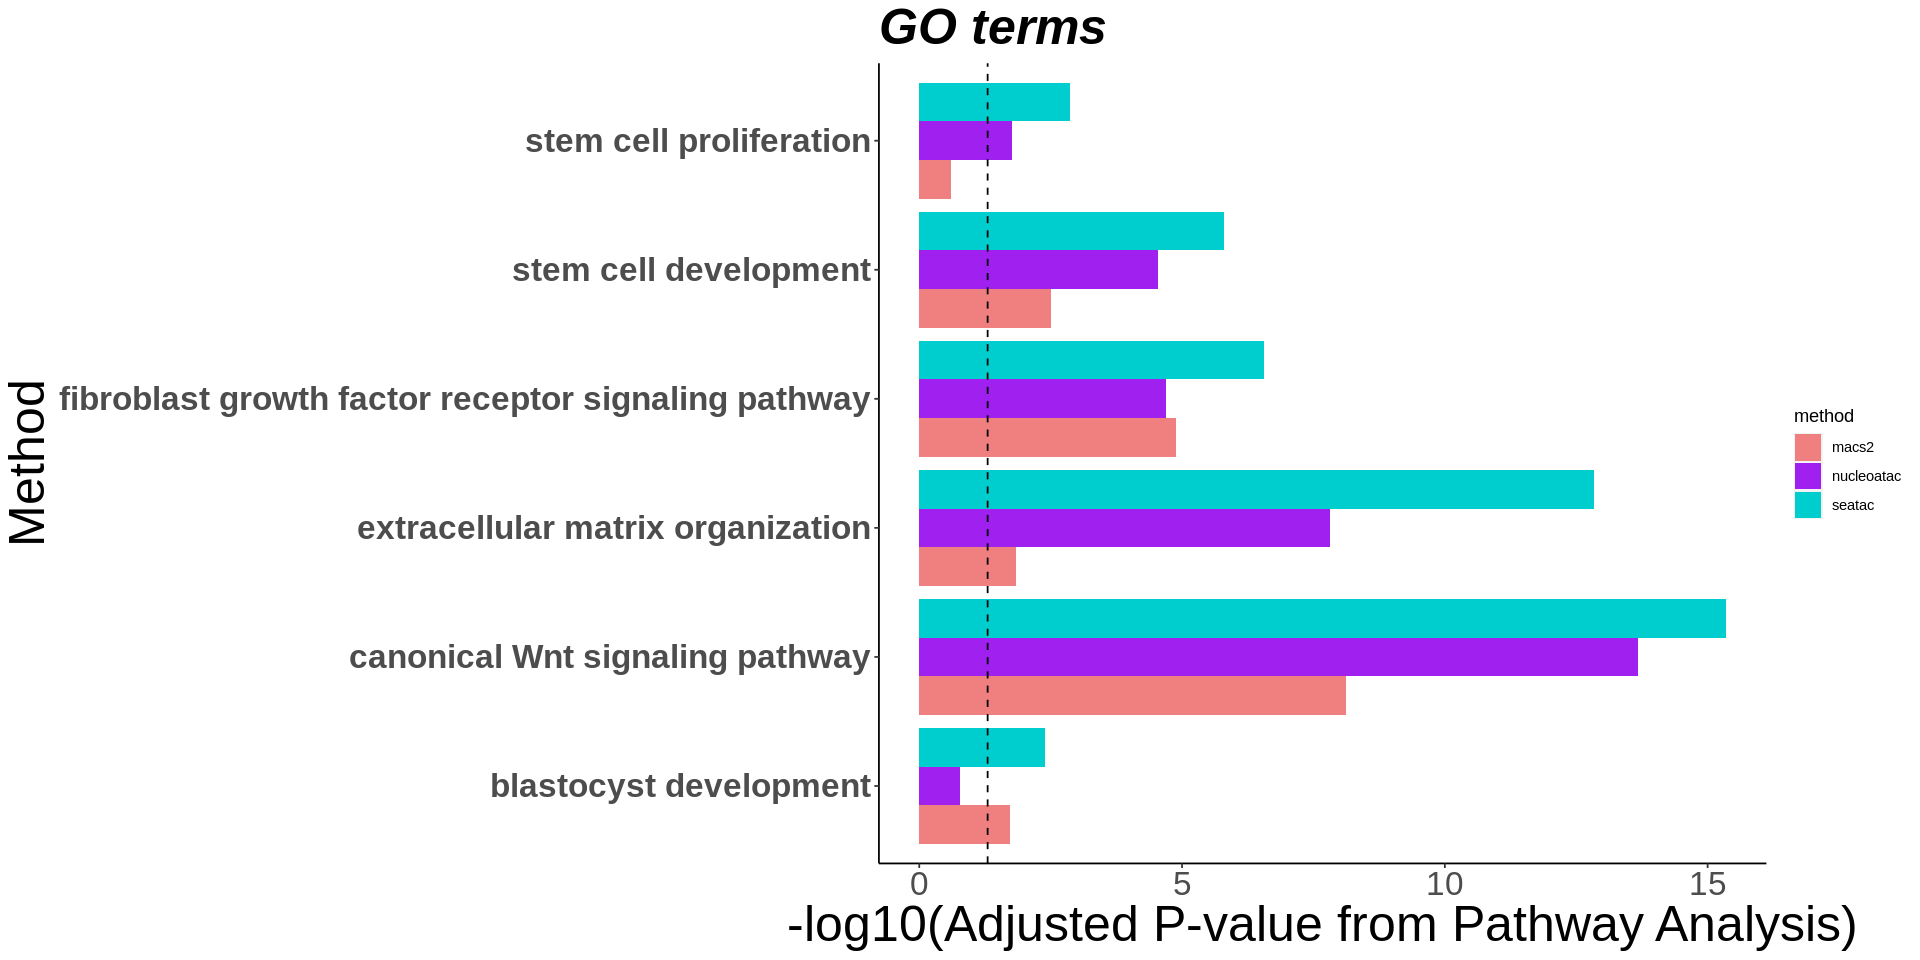

In [47]:
options(repr.plot.width = 16, repr.plot.height = 8)
df_osk %>%
    ggplot(aes(x = Description, y = -log10(p.adjust), fill = method)) + 
      geom_bar(stat='identity', position='dodge') +
      geom_hline(yintercept = -log10(0.05), linetype = 'dashed') +
      coord_flip() +
      scale_fill_manual(values = c('lightcoral','purple','cyan3')) +
      xlab('Method') +
      ylab('-log10(Adjusted P-value from Pathway Analysis)') +
      ggtitle('GO terms') +
      theme(
           strip.text = element_text(size = 20),
           axis.title.x = element_text(size = 30),
           axis.title.y = element_text(size = 30),
           axis.text.x = element_text(size = 20),
           axis.text.y = element_text(size = 20, face = 'bold'),
           plot.title = element_text(size=30, face='bold.italic'),
           panel.grid.major = element_blank(), 
           panel.grid.minor = element_blank(),
           panel.background = element_blank(), 
           axis.line = element_line(colour = "black")
           ) 

# Venn Diagram showing overlap between SeATAC only, MACS2 only and NucleoATAC only regions

(polygon[GRID.polygon.78], polygon[GRID.polygon.79], polygon[GRID.polygon.80], polygon[GRID.polygon.81], polygon[GRID.polygon.82], polygon[GRID.polygon.83], text[GRID.text.84], text[GRID.text.85], text[GRID.text.86], text[GRID.text.87], text[GRID.text.88], text[GRID.text.89], text[GRID.text.90], text[GRID.text.91], text[GRID.text.92], text[GRID.text.93]) 

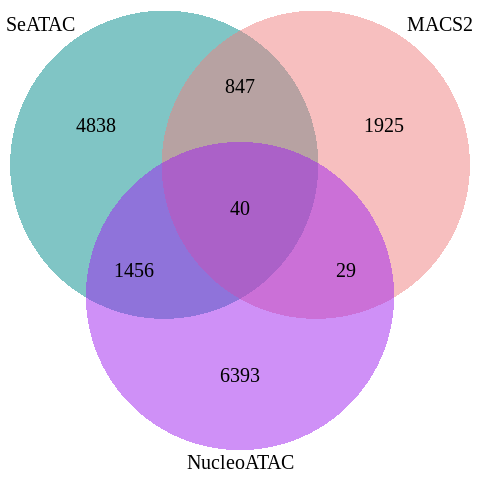

In [48]:
options(repr.plot.width=4, repr.plot.height=4)
draw.triple.venn(
    area1 = length(down_mef[down_mef$log_ratio < -ARGS[['log_ratio_cutoff']] & down_mef$padj < ARGS[['padjusted_cutoff']]]),                         # Create venn diagram with three sets
    area2 = length(down_mef[down_mef$macs2 > -log10(ARGS[['padjusted_cutoff']])]),
    area3 = length(down_mef[down_mef$difference < -0.4 & down_mef$osk == TRUE]),
    n12 = length(down_mef[down_mef$log_ratio  < -ARGS[['log_ratio_cutoff']] & down_mef$padj < ARGS[['padjusted_cutoff']] & down_mef$macs2 > -log10(ARGS[['padjusted_cutoff']])]),
    n23 = length(down_mef[down_mef$macs2 > -log10(ARGS[['padjusted_cutoff']]) & down_mef$difference < -0.4 & down_mef$osk == TRUE]),
    n13 = length(down_mef[down_mef$log_ratio < -ARGS[['log_ratio_cutoff']] & down_mef$padj < ARGS[['padjusted_cutoff']] & down_mef$difference < -0.4 & down_mef$osk == TRUE]), 
    n123 = length(down_mef[down_mef$log_ratio < -ARGS[['log_ratio_cutoff']] & down_mef$padj < ARGS[['padjusted_cutoff']] & down_mef$macs2 > -log10(ARGS[['padjusted_cutoff']]) & down_mef$difference < -0.4 & down_mef$osk == TRUE]),
    category = c("SeATAC", 'MACS2','NucleoATAC'), 
    lty = "blank", 
    fill = c("cyan4", "lightcoral","purple"),
    scale = FALSE
    )

# VPLOTS for SeATAC only, MACS2 only and NucleoATAC only regions

In [49]:
remote_bam_files <- c(
  MEF = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/MEF.dedup.bam',
  MEF_OSK_D7 = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/OSK_D7.dedup.bam'
)
for (i in 1:length(remote_bam_files)){
  sprintf('wget -cx %s', remote_bam_files[i]) %>% system()
}
local_bam_files <- gsub('https://', './', remote_bam_files)

## Load bed files

In [50]:
remote_bed_files <- gsub('.bam', '_summits.bed', remote_bam_files)
for (i in 1:length(remote_bed_files)){
  sprintf('wget -cx %s', remote_bed_files[i]) %>% system()
}
local_bed_files <- gsub('https://', './', remote_bed_files)
all(file.exists(local_bed_files))

[1] TRUE

## Training VAE

In [51]:
models <- list()

In [52]:
cond <- c('MEF', 'MEF_OSK_D7')

In [53]:
gr0 <- lapply(local_bed_files[cond], function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = ARGS[['step_size']])
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 1, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(fix = 'center', width = ARGS[['window_size']])
gr0 <- gr0[!seqnames(gr0) %in% c('chrM', 'chrY')]

In [54]:
gr <- slidingWindows(gr0, width = ARGS[['block_size']], step = ARGS[['sliding_step']]) %>% unlist()
set.seed(1L); gr <- sample(gr, ARGS[['vae_num_peaks']])
counts <- count_reads(gr, local_bam_files[cond], genome = BSgenome.Mmusculus.UCSC.mm10,  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]))

validate_bam | indexing bam files: ./s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/MEF.dedup.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/MEF.dedup.bam

validate_bam | indexing bam files: ./s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/OSK_D7.dedup.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/OSK_D7.dedup.bam



In [55]:
valid <- rowSums(counts >= ARGS[['min_reads']]) == length(cond)
gr <- gr[valid]
sprintf('number of training peaks for VaeModel: %d', length(gr)) %>% message()

number of training peaks for VaeModel: 2950



In [56]:
x <- read_vplot(
  gr, 
  filenames = local_bam_files[cond], 
  genome = BSgenome.Mmusculus.UCSC.mm10, 
  bin_size = ARGS[['bin_size']], 
  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), 
  fragment_size_interval = ARGS[['fragment_size_interval']]
)

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/MEF.dedup.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/OSK_D7.dedup.bam



In [57]:
model <- new('VaeModel', model = VaeModel(
  n_samples = dim(x)['sample'],
  latent_dim = ARGS[['vae_latent']],
  block_size = ARGS[['block_size']],
  bin_size = ARGS[['bin_size']],
  filters0 = ARGS[['vae_filters0']],
  filters = ARGS[['vae_filters']],
  upsample_layers = ARGS[['vae_upsample_layers']],
  downsample_layers = ARGS[['vae_downsample_layers']],
  fragment_size_range  = c(0, ARGS[['fragment_size_range_max']]),
  fragment_size_interval = ARGS[['fragment_size_interval']]
))
lr <- WarmUpAndCosineDecay(
  base_learning_rate = ARGS[['vae_base_learning_rate']],
  num_examples = nrow(x),
  batch_size = ARGS[['vae_batch_size']],
  epochs = ARGS[['vae_epochs']],
  warmup_epochs = as.integer(ARGS[['vae_epochs']] * ARGS[['vae_warmup_ratio']])
)
beta <- beta_schedule(
  method = ARGS[['vae_beta_schedule_method']],
  beta0 = ARGS[['vae_beta0']],
  epochs = ARGS[['vae_epochs']]
)
d <- model %>% prepare_data(x)
d <- d %>% tensor_slices_dataset()
models[['MEF']] <- model %>% fit(d, batch_size =  ARGS[['vae_batch_size']], epochs = ARGS[['vae_epochs']], learning_rate = lr, compile = TRUE, beta = beta)

epoch=     1/   200 | beta=1.000e+00 | loss= 3456.6676839 | loss_reconstruction= 3456.1569417 | loss_kl=    0.5107302

epoch=     2/   200 | beta=1.000e+00 | loss= 2891.1790975 | loss_reconstruction= 2890.6681213 | loss_kl=    0.5109636

epoch=     3/   200 | beta=1.000e+00 | loss= 2546.5509440 | loss_reconstruction= 2545.7879944 | loss_kl=    0.7629256

epoch=     4/   200 | beta=1.000e+00 | loss= 2246.8249105 | loss_reconstruction= 2246.1040548 | loss_kl=    0.7208610

epoch=     5/   200 | beta=1.000e+00 | loss= 1859.1099701 | loss_reconstruction= 1858.5486857 | loss_kl=    0.5612771

epoch=     6/   200 | beta=1.000e+00 | loss= 1397.9871623 | loss_reconstruction= 1397.6749471 | loss_kl=    0.3122098

epoch=     7/   200 | beta=1.000e+00 | loss=  953.4414876 | loss_reconstruction=  953.3719050 | loss_kl=    0.0695785

epoch=     8/   200 | beta=1.000e+00 | loss=  628.2882385 | loss_reconstruction=  628.2596944 | loss_kl=    0.0285402

epoch=     9/   200 | beta=1.000e+00 | loss=  44

## Subsetting regions to include SEATAC only, MACS2 only and NucleoATAC only to run PREDICT without running into OOM error

In [58]:
res_sub <- down_mef[(down_mef$padj < ARGS[['padjusted_cutoff']] & abs(down_mef$log_ratio) > ARGS[['log_ratio_cutoff']]) | down_mef$macs2 > -log10(ARGS[['padjusted_cutoff']]) | (down_mef$difference < -0.4 & down_mef$osk== TRUE)]

In [59]:
x <- read_vplot(res_sub, filenames = local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/MEF.dedup.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/OSK_D7.dedup.bam



#SeATAC Only

In [60]:
only_seatac <- res_sub$padj < ARGS[['padjusted_cutoff']] & res_sub$log_ratio < -ARGS[['log_ratio_cutoff']] & !res_sub$macs2 > -log10(ARGS[['padjusted_cutoff']]) & !(res_sub$difference < -0.4 & res_sub$osk== TRUE)
sprintf('# of Vplots that have increased nuclsoeome occupancy at the center for undifferentiated MEFs: %d', sum(only_seatac)) %>% message()

# of Vplots that have increased nuclsoeome occupancy at the center for undifferentiated MEFs: 4838



In [61]:
x2 <- model %>% predict(x[only_seatac], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
p1 <- vplot(x2, 'counts', ncol = 2L) +ggtitle('counts                                        SeATAC only') 
p2 <- vplot(x2, 'predicted_counts', ncol = 2L)

# MACs2 Only

In [62]:
only_macs2 <- res_sub$macs2 > -log10(ARGS[['padjusted_cutoff']])  & !(res_sub$padj < ARGS[['padjusted_cutoff']] & res_sub$log_ratio < -ARGS[['log_ratio_cutoff']]) & !(res_sub$difference < -0.4 & res_sub$osk== TRUE)
sprintf('# of Vplots that have increased nuclsoeome occupancy at the center for undifferentiated MEFs and summits called by MACS2 in MEFs post OSK induction: %d', sum(only_macs2)) %>% message()

# of Vplots that have increased nuclsoeome occupancy at the center for undifferentiated MEFs and summits called by MACS2 in MEFs post OSK induction: 1925



In [63]:
x3 <- model %>% predict(x[only_macs2], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
p3 <- vplot(x3, 'counts', ncol = 2L) + ggtitle('counts                                  MACS2 only') 
p4 <- vplot(x3, 'predicted_counts', ncol = 2L)

#NucleoATAC Only

In [64]:
only_nucleoatac <- !(res_sub$padj < ARGS[['padjusted_cutoff']] & res_sub$log_ratio < -ARGS[['log_ratio_cutoff']]) & !res_sub$macs2 > -log10(ARGS[['padjusted_cutoff']]) & res_sub$difference < -0.4 & res_sub$osk== TRUE
sprintf('# of Vplots that have increased nuclsoeome occupancy at the center and regions from NucleoATAC with increased nucleosome occupance for undifferentiated MEFs : %d', sum(only_nucleoatac)) %>% message()

# of Vplots that have increased nuclsoeome occupancy at the center and regions from NucleoATAC with increased nucleosome occupance for undifferentiated MEFs : 6393



In [65]:
x4 <- model %>% predict(x[only_nucleoatac], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
p5 <- vplot(x4, 'counts', ncol = 2L) + ggtitle('counts                                  NucleoATAC only') 
p6 <- vplot(x4, 'predicted_counts', ncol = 2L)

# Vplots for MEFs post OSK induction

Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”


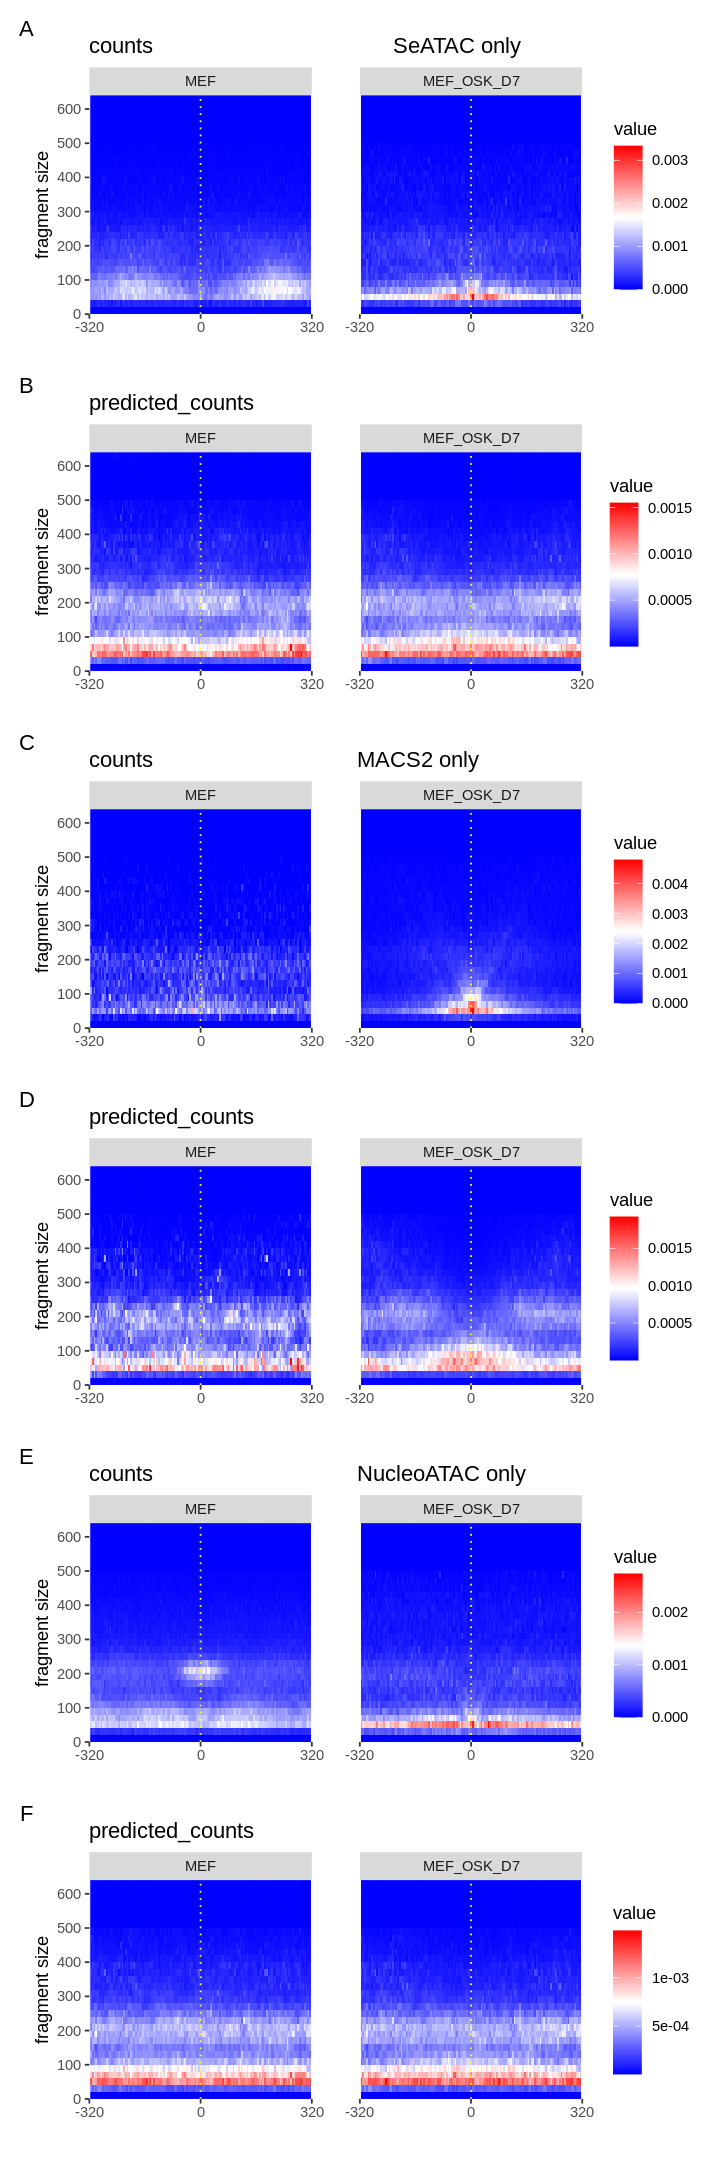

In [66]:
options(repr.plot.width = 6, repr.plot.height = 18)
p1 / p2 / p3/ p4 / p5 / p6 + plot_annotation(tag_levels = 'A')

## SessionInfo

In [67]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] clusterProfiler_4.2.2                    
 [2] org.Mm.eg.db_3.14.0                      
 [3] TxDb.Mmusculus.UCSC.mm10.knownGene_3.10.0
 [4] GenomicFeatures_1.46.5                   
 [5] AnnotationDbi_1.56.2                     
 [6] ChIPse

In [68]:
Sys.time() - start_time

Time difference of 52.35444 mins